# Predict Customer Lifetime Value(CLTV) with linear regression

<a id='table'></a>
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dw">Data wrangling</a></li>
<li><a href="#eda">Exploratory data analysis</a></li>
<li><a href="#datacleaning">Data cleaning and transformation</a></li>
<li><a href="#dataanalysis">Data analysis</a></li>
<li><a href="#predictcltv">Predict CLTV</a></li>
<li><a href="#summary">Summary</a></li>
</ul>

<a id='intro'></a>
## Introduction

### CLTV

**Customer Lifetime Value (CLTV)** represents the total amount of money a customer is expected to spend in a business during his/her lifetime. This is an important metric to monitor because it helps to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

### Dataset

For this analysis I am using a public dataset from UCI Machine Learning Repositiry, which can found [here](http://archive.ics.uci.edu/ml/index.php). This dataset contains information on transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Attribute information:**

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal
* Quantity: The quantities of each product (item) per transaction. Numeric
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated
* UnitPrice: Unit price. Numeric, Product price per unit in sterling
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer
* Country: Country name. Nominal, the name of the country where each customer resides.

<a id='dw'></a>
## Data wrangling

In [103]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/online retail.csv'
df = pd.read_csv(file_path)



In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


*Description* and *CustomerID* columns have NULL values

In [108]:
df.shape

(541909, 8)

<a id='eda'></a>
## Exploratory data analysis (EDA)

Let us have a look at the data and decide whether we need any data cleaning and data transformation for further analysis.

### NULL values

In [109]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [110]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [111]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598


About 25% of CustomerIDs is missing

### Duplicates

In [112]:
# Check the number of duplicated values
df.duplicated().sum().sum()

5268

In [113]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [114]:
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,12/1/2010 11:49,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,12/1/2010 11:49,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,12/1/2010 11:49,3.75,17920.0,United Kingdom


It seems that products, which were bought together in one invoice, were considered as duplicates. However, there are no duplicates, if we look at the *Description* column

### Number of unique customers

In [115]:
df['CustomerID'].nunique()

4372

### Number of purchases

In [116]:
df['InvoiceNo'].nunique()

25900

### Period of time

In [117]:
df['InvoiceDate'].min()

'1/10/2011 10:04'

In [118]:
df['InvoiceDate'].max()

'9/9/2011 9:52'

### Country

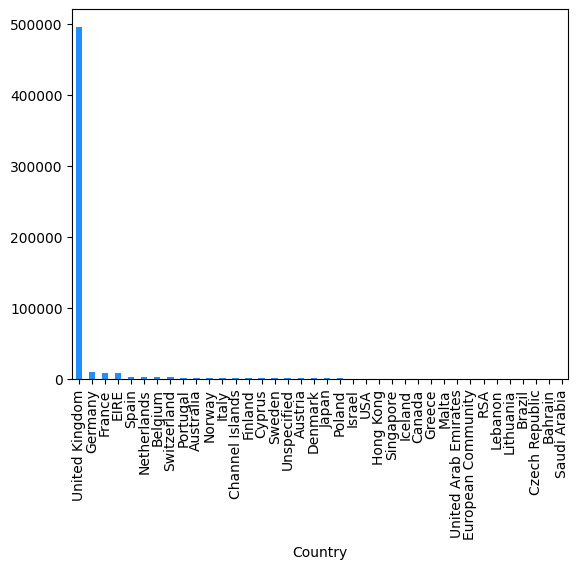

In [119]:
df['Country'].value_counts().plot.bar(color='dodgerblue');

In [120]:
df['Country'].nunique()

38

So we have approximately 1 year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the UK)

### Quantity and unit price of the products

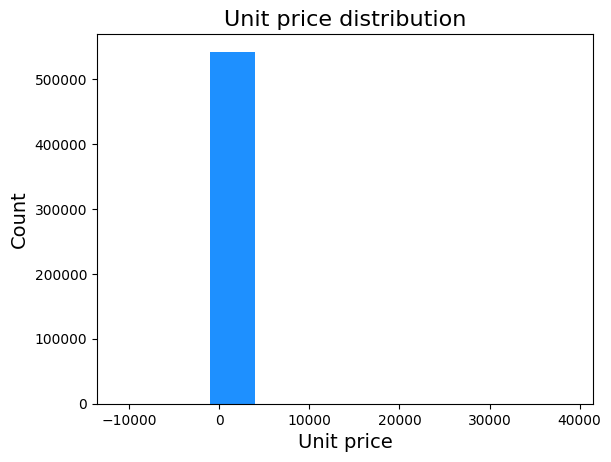

In [121]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove negative records and outliers and look at the price distribution.

In [122]:
df['UnitPrice'].describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

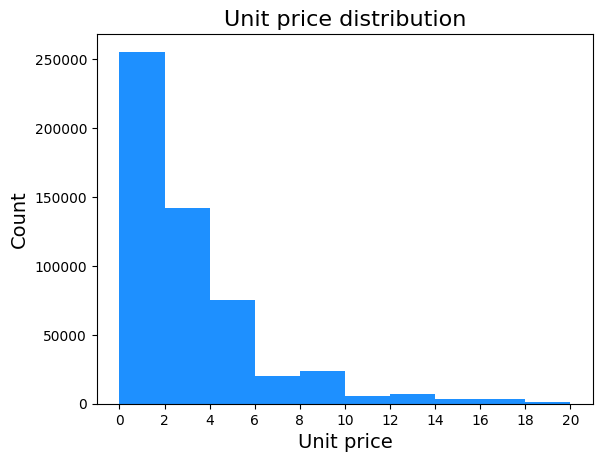

In [123]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

The price for most of the products is equal or less than 10£

Let's look at the negative values in *UnitPrice*

In [124]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


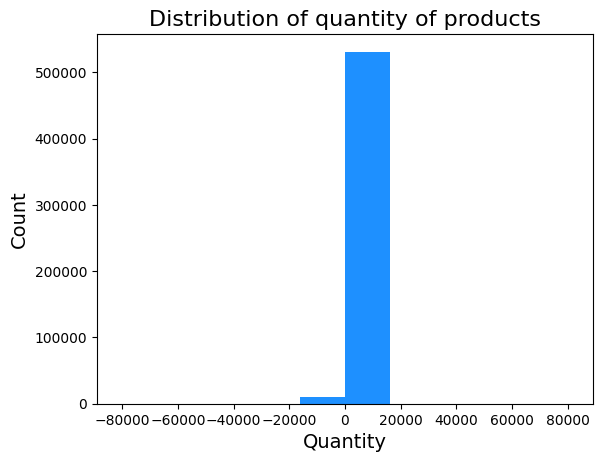

In [125]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity', color='dodgerblue')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [126]:
df['Quantity'].describe(percentiles=[.99])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

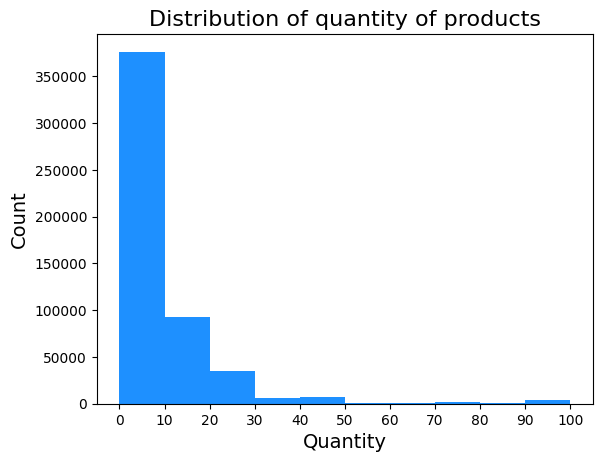

In [127]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In most cases customers buy less than 50 items per order.

Let's look at the negative values in *Quantity*

In [128]:
neg_quantity = df[df['Quantity']<0]

In [129]:
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [130]:
neg_quantity.shape

(10624, 8)

In [131]:
print("The percentage of records with negative Quantity:", neg_quantity.shape[0]*100/df.shape[0])

The percentage of records with negative Quantity: 1.9604767590130445


There are 10,624 raws with negative *Quantity* values, which is about 2% out of the total number of records in the dataframe.

<a id='datacleaning'></a>
## Data cleaning and transformation

### Drop NULL values

We have NULL records in columns *CustomerId* and *Description*. Because we are planning to predict CLTV, we need records for each customer ID to proceed calculations. Let's drop rows containing NULL values.

In [132]:
df.dropna(subset=['CustomerID'], inplace=True)

In [133]:
df.shape

(406829, 8)

In [134]:
# Let's check NULL records in the CustomerId column
df['CustomerID'].isnull().sum()

0

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### Handle negative quantity

In [136]:
df = df.loc[df['Quantity'] > 0]

In [137]:
# Let's check negative records
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Remove rows with negative price

In [138]:
df = df.loc[df['UnitPrice'] > 0]

In [139]:
# Let's check negative records
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Handle incomplete data

Period of time for the purchase records is from December 1, 2010 to December  9, 2011. The data for the last month is incomplete. Because we are planning to predict CLTV for the next 3 months and we will be aggregating data monthly, let us ignore the records for the incomplete month.

In [140]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [141]:
# Let's check the time period
df['InvoiceDate'].min(), df['InvoiceDate'].max()

('1/10/2011 10:32', '2/9/2011 9:10')

### Calculate total sales

Let us create a column for the total sales value for each transaction

In [142]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [143]:
df_orders = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})

In [144]:
df_orders.head(8)

Sales       InvoiceDate
CustomerID InvoiceNo                            
12346.0    541431     77183.60   1/18/2011 10:01
12347.0    537626       711.79   12/7/2010 14:57
           542237       475.39   1/26/2011 14:30
           573511      1294.32  10/31/2011 12:25
           581180       224.82   12/7/2011 15:52
12348.0    539318       892.80  12/16/2010 19:09
           541998       227.44   1/25/2011 10:42
12349.0    577609      1757.55   11/21/2011 9:51

In [145]:
df_orders['InvoiceDate'].max(), df_orders['InvoiceDate'].min()

('2/9/2011 9:10', '1/10/2011 10:32')

<a id='dataanalysis'></a>
## Data analysis

In order to predict and calculate CLTV, we have to estimate the **frequency**, **recency**, and **total amount** of purchases by each customer. We are going to determine basic information about each customer's average and lifetime purchase amount, as well as each customer's duration and frequency of purchase.

In [146]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [147]:
import pandas as pd

# Assuming df_orders is your DataFrame containing order details
# Convert 'InvoiceDate' to datetime format
df_orders['InvoiceDate'] = pd.to_datetime(df_orders['InvoiceDate'])

# Define custom aggregation functions
def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return x.diff().mean()

# Reset index and perform aggregation
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
    'Sales': ['min', 'max', 'sum', 'mean', 'count'],
    'InvoiceDate': ['min', 'max', purchase_duration, avg_frequency]
})


In [148]:
df_summary.head()

Sales                                             InvoiceDate  \
                 min       max       sum      mean count                 min   
CustomerID                                                                     
12346.0     77183.60  77183.60  77183.60  77183.60     1 2011-01-18 10:01:00   
12347.0       224.82   1294.32   2706.32    676.58     4 2010-12-07 14:57:00   
12348.0       227.44    892.80   1120.24    560.12     2 2010-12-16 19:09:00   
12349.0      1757.55   1757.55   1757.55   1757.55     1 2011-11-21 09:51:00   
12350.0       334.40    334.40    334.40    334.40     1 2011-02-02 16:01:00   

                                                                    
                           max purchase_duration     avg_frequency  
CustomerID                                                          
12346.0    2011-01-18 10:01:00                 0               NaT  
12347.0    2011-12-07 15:52:00               365 121 days 16:18:20  
12348.0    2011-01-25 10:42:00                39  39 days 15:33:00  
12349.0    2011-11-21 09:51:00                 0               NaT  
12350.0    2011-02-02 16:01:00                 0               NaT

This data gives us an idea on the purchases each customer made.

Let us have a closer look at the **repeat customers**. Particularly, we are interested in the **number of purchases** and **frequency of purchases** made.  

### Repeat customers

#### Number of purchases

In [149]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]

In [150]:
df_summary

,sales_min,sales_max,sales_sum,sales_mean,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_avg_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,NaT
12347.0,224.82,1294.32,2706.32,676.580000,4,2010-12-07 14:57:00,2011-12-07 15:52:00,365,121 days 16:18:20
12348.0,227.44,892.80,1120.24,560.120000,2,2010-12-16 19:09:00,2011-01-25 10:42:00,39,39 days 15:33:00
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,NaT
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,NaT
...,...,...,...,...,...,...,...,...,...
18276.0,335.86,335.86,335.86,335.860000,1,2011-10-27 10:54:00,2011-10-27 10:54:00,0,NaT
18277.0,110.38,110.38,110.38,110.380000,1,2011-10-12 15:22:00,2011-10-12 15:22:00,0,NaT
18282.0,77.84,77.84,77.84,77.840000,1,2011-12-02 11:43:00,2011-12-02 11:43:00,0,NaT


In [151]:
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [152]:
df_summary.shape

(1639, 9)

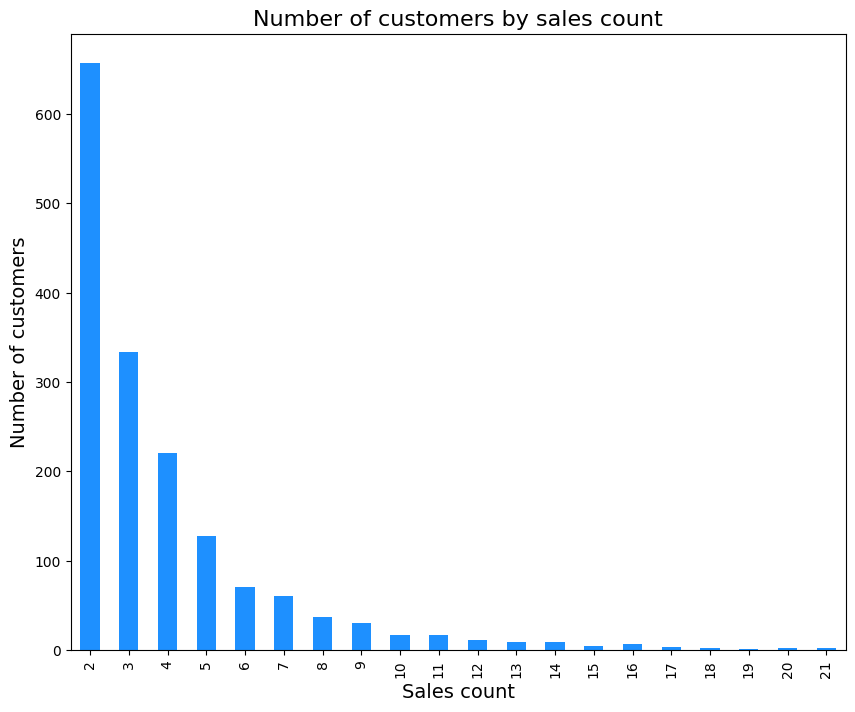

In [153]:
# Assuming 'sales_count' is a column in df_summary
ax = df_summary.groupby('sales_count').size()[:20].plot(
    kind='bar',
    color='dodgerblue',
    figsize=(10,8),
    grid=False
)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of customers by sales count', fontsize=16)
plt.show()


In our analysis, we consider repeat customers who made at least 2 purchases. As you can see, repeat customers tend to make about 12 purchases or less.

#### Average number of days between purchases

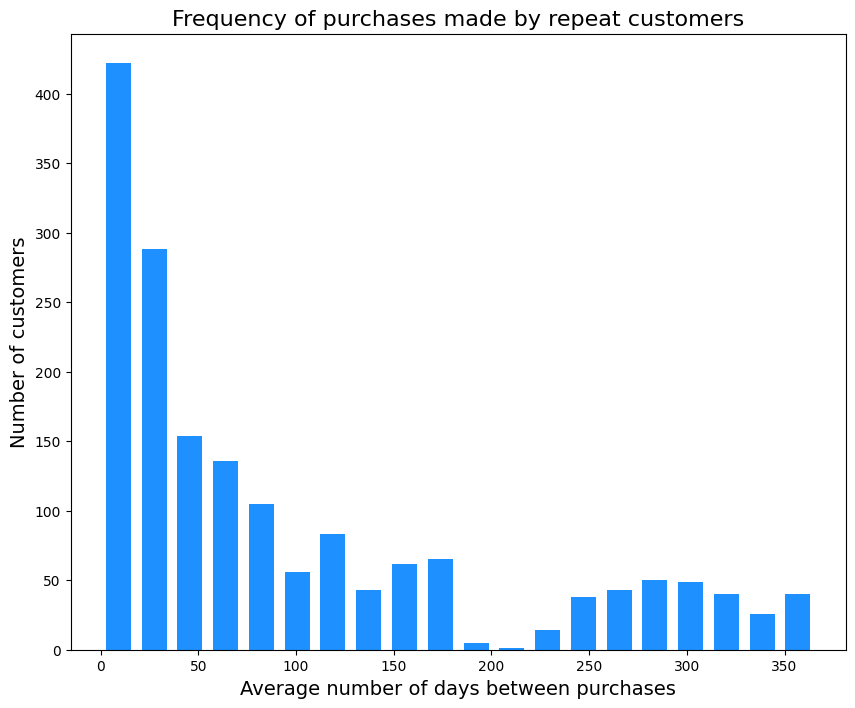

In [154]:
import pandas as pd

# Define a function to calculate purchase frequency
def purchase_frequency(x):
    return x.diff().mean().days  # Example calculation, adjust as per your logic

# Assuming df_orders is your DataFrame containing order details
# Convert 'InvoiceDate' to datetime format
df_orders['InvoiceDate'] = pd.to_datetime(df_orders['InvoiceDate'])

# Reset index and perform aggregation
df_summary = df_orders.groupby('CustomerID').agg({
    'Sales': ['min', 'max', 'sum'],
    'InvoiceDate': ['min', 'max', lambda x: (x.max() - x.min()).days, purchase_frequency]
})

# Flatten the multi-level column index
df_summary.columns = ['_'.join(col).strip() for col in df_summary.columns.values]

# Now 'invoicedate_purchase_frequency' should be available
# Plotting histogram for 'invoicedate_purchase_frequency'
ax = df_summary['InvoiceDate_purchase_frequency'].hist(
    bins=20,
    color='dodgerblue',
    rwidth=0.7,
    figsize=(10,8),
    grid=False
)
plt.xlabel('Average number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16)
plt.show()


As you can see from this plot, the majority of repeat customers tend to make a purchase every 12 to 50 days.

<a id='predictcltv'></a>
## Predict CLTV

We are going to build a model, which predicts CLTV for 3 months. First, let us slice the data into chunks with 3-month data each and take the last chunk as the target for predictions.

### Prepare data

In [155]:
clv_freq = '3M'

In [156]:
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [157]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [158]:
df_data = df_data.reset_index()

In [159]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.60,1
1,12347.0,2010-12-31,711.79,711.79,1
2,12347.0,2011-03-31,475.39,475.39,1
3,12347.0,2011-12-31,1519.14,759.57,2
4,12348.0,2010-12-31,892.80,892.80,1


In [160]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   4682 non-null   float64       
 1   InvoiceDate  4682 non-null   datetime64[ns]
 2   sales_sum    4682 non-null   float64       
 3   sales_avg    4682 non-null   float64       
 4   sales_count  4682 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 183.0 KB


For further simplicity, let us encode *InvoiceDate* column and define in which month a purchase was made

In [161]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [162]:
map_date_month

{'2011-12-31': 'M_1', '2011-03-31': 'M_2', '2010-12-31': 'M_3'}

In [163]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])

In [164]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.60,1,M_2
1,12347.0,2010-12-31,711.79,711.79,1,M_3
2,12347.0,2011-03-31,475.39,475.39,1,M_2
3,12347.0,2011-12-31,1519.14,759.57,2,M_1
4,12348.0,2010-12-31,892.80,892.80,1,M_3


In [165]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M
M_1    2560
M_2    1237
M_3     885
Name: count, dtype: int64

We marked data with a chunk/time period it belongs to. Now, let us create a set with features and target variables. In order to train a model, we have to transfrom the data into tabular data, where each row represent a costomer and each column represent a feature.

In [166]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'],
                values=['sales_sum', 'sales_avg', 'sales_count'],
                columns='M',
                index='CustomerID')

In [167]:
df_features.reset_index()

CustomerID     sales_avg         sales_count      sales_sum        
M                         M_2     M_3         M_2  M_3       M_2     M_3
0       12346.0  77183.600000     NaN         1.0  NaN  77183.60     NaN
1       12347.0    475.390000  711.79         1.0  1.0    475.39  711.79
2       12348.0    227.440000  892.80         1.0  1.0    227.44  892.80
3       12350.0    334.400000     NaN         1.0  NaN    334.40     NaN
4       12352.0    296.500000     NaN         1.0  NaN    296.50     NaN
...         ...           ...     ...         ...  ...       ...     ...
1677    18257.0    181.900000     NaN         2.0  NaN    363.80     NaN
1678    18259.0           NaN  376.30         NaN  1.0       NaN  376.30
1679    18260.0    557.070000  230.70         1.0  1.0    557.07  230.70
1680    18269.0           NaN  168.60         NaN  1.0       NaN  168.60
1681    18283.0    105.966667     NaN         3.0  NaN    317.90     NaN

[1682 rows x 7 columns]

In [168]:
df_features.columns = ['_'.join(col) for col in df_features.columns]

In [169]:
df_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3
CustomerID,,,,,,
12346.0,77183.60,NaN,1.0,NaN,77183.60,NaN
12347.0,475.39,711.79,1.0,1.0,475.39,711.79
12348.0,227.44,892.80,1.0,1.0,227.44,892.80
12350.0,334.40,NaN,1.0,NaN,334.40,NaN
12352.0,296.50,NaN,1.0,NaN,296.50,NaN


In [170]:
df_features.reset_index(level=0, inplace=True)

In [171]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3
0,12346.0,77183.60,NaN,1.0,NaN,77183.60,NaN
1,12347.0,475.39,711.79,1.0,1.0,475.39,711.79
2,12348.0,227.44,892.80,1.0,1.0,227.44,892.80
3,12350.0,334.40,NaN,1.0,NaN,334.40,NaN
4,12352.0,296.50,NaN,1.0,NaN,296.50,NaN


We got Null values after pivoting the table. Let us fill in the Null values with 0.

In [172]:
df_features.fillna(0, inplace=True)

In [173]:
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [174]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1682 non-null   float64
 1   sales_avg_M_2    1682 non-null   float64
 2   sales_avg_M_3    1682 non-null   float64
 3   sales_count_M_2  1682 non-null   float64
 4   sales_count_M_3  1682 non-null   float64
 5   sales_sum_M_2    1682 non-null   float64
 6   sales_sum_M_3    1682 non-null   float64
dtypes: float64(7)
memory usage: 92.1 KB


In [175]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3
0,12346.0,77183.60,0.00,1.0,0.0,77183.60,0.00
1,12347.0,475.39,711.79,1.0,1.0,475.39,711.79
2,12348.0,227.44,892.80,1.0,1.0,227.44,892.80
3,12350.0,334.40,0.00,1.0,0.0,334.40,0.00
4,12352.0,296.50,0.00,1.0,0.0,296.50,0.00


Our target variables will be:

In [176]:
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [177]:
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

In [178]:
df_target.shape

(2560, 2)

In [179]:
df_target.head()

,CustomerID,CLV_3M
3,12347.0,1519.14
6,12349.0,1757.55
9,12352.0,311.73
11,12356.0,58.35
12,12357.0,6207.67


In [180]:
df_sample_set = df_features.merge(
                df_target,
                left_on='CustomerID',
                right_on='CustomerID',
                how='left')

In [181]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3,CLV_3M
0,12346.0,77183.60,0.00,1.0,0.0,77183.60,0.00,NaN
1,12347.0,475.39,711.79,1.0,1.0,475.39,711.79,1519.14
2,12348.0,227.44,892.80,1.0,1.0,227.44,892.80,NaN
3,12350.0,334.40,0.00,1.0,0.0,334.40,0.00,NaN
4,12352.0,296.50,0.00,1.0,0.0,296.50,0.00,311.73


In [182]:
df_sample_set.fillna(0, inplace=True)

In [183]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3,CLV_3M
0,12346.0,77183.60,0.00,1.0,0.0,77183.60,0.00,0.00
1,12347.0,475.39,711.79,1.0,1.0,475.39,711.79,1519.14
2,12348.0,227.44,892.80,1.0,1.0,227.44,892.80,0.00
3,12350.0,334.40,0.00,1.0,0.0,334.40,0.00,0.00
4,12352.0,296.50,0.00,1.0,0.0,296.50,0.00,311.73


In [184]:
df_sample_set['CLV_3M'].describe()

count     1682.000000
mean       920.706231
std       3712.676313
min          0.000000
25%          0.000000
50%        218.835000
75%        745.132500
max      79497.890000
Name: CLV_3M, dtype: float64

### Build linear regression

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [186]:
target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

In [187]:
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_sum_M_2',
 'sales_sum_M_3']

In [188]:
df_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3,CLV_3M
0,12346.0,77183.600000,0.00,1.0,0.0,77183.60,0.00,0.00
1,12347.0,475.390000,711.79,1.0,1.0,475.39,711.79,1519.14
2,12348.0,227.440000,892.80,1.0,1.0,227.44,892.80,0.00
3,12350.0,334.400000,0.00,1.0,0.0,334.40,0.00,0.00
4,12352.0,296.500000,0.00,1.0,0.0,296.50,0.00,311.73
...,...,...,...,...,...,...,...,...
1677,18257.0,181.900000,0.00,2.0,0.0,363.80,0.00,774.76
1678,18259.0,0.000000,376.30,0.0,1.0,0.00,376.30,1070.40
1679,18260.0,557.070000,230.70,1.0,1.0,557.07,230.70,0.00
1680,18269.0,0.000000,168.60,0.0,1.0,0.00,168.60,0.00


In [189]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features],
                                    df_sample_set[target_var],
                                    random_state=2,
                                    test_size=0.35)

In [190]:
lin_reg = LinearRegression(n_jobs=1)

In [191]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [192]:
lin_reg.intercept_

430.7323903773623

In [193]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [194]:
coef

,feature,coef
0,sales_avg_M_2,-1.086190
1,sales_avg_M_3,-2.765572
2,sales_count_M_2,-75.240920
3,sales_count_M_3,-249.995924
4,sales_sum_M_2,1.122964
5,sales_sum_M_3,3.185681


### Evaluate the model

In [195]:
from sklearn.metrics import r2_score, median_absolute_error

In [196]:
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

#### R-Squared

In [197]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.72
R-Squared for Test set: 0.56


R-Squared is the same for the train and test sets. Therefore, we do not have any overfitting or underfitting of the model.

#### Median Absolute Error

In [198]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

MedAE for Train set: 359.34
MedAE for Test set: 361.45


MedAE has a small difference between test and train sets.

#### Scatter plot

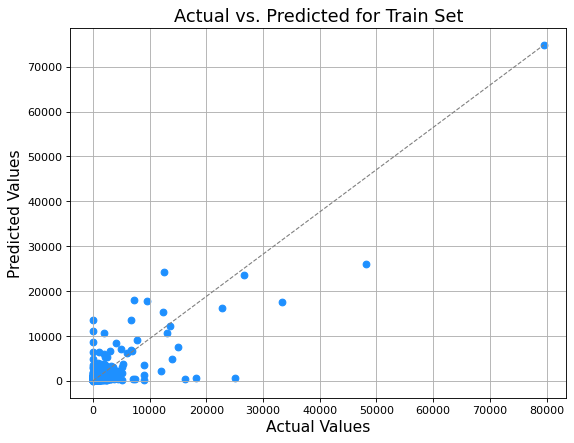

In [199]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='dodgerblue')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Train Set', fontsize=16)
plt.grid()

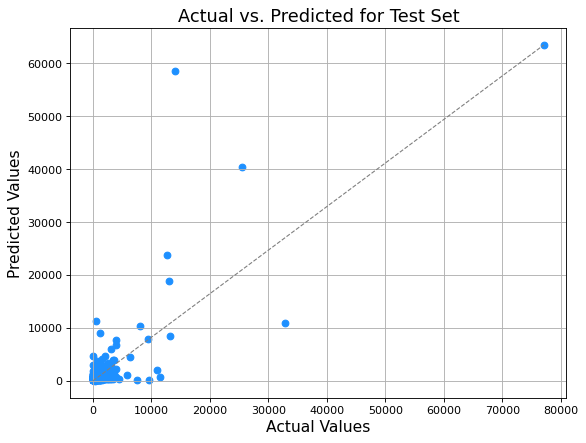

In [200]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.

<a id='summary'></a>
## Summary

* Based on the data analysis, we found that the repeat customers tend to make about 12 purchases or less within a year and the majority of repeat customers tend to make a purchase every 12 to 50 days
* We predicted CLTV for customers of the online retail using linear regression
* R-squared value for the test set is 0.71, which is not great but it is a good benchmark to try other regression models such as Random Forest Regressor
* By knowing CLTV, we can develop positive ROI strategies and make decisions about how much money to invest in acquiring new customers and retaining existing ones.